In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [5]:
cs_data = pd.read_csv("data_win_prediction.csv",sep=";")

In [6]:
cs_data.head()

,win,map,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo,\tMatch ID
0,team a,de_mirage,"58,86486486","0,726307824","1720,4","47,28921569","0,792614706",1536,1-051c5a18-6a99-4e5e-bef7-ed1143474b33
1,team a,de_inferno,"52,34162896","0,764807353","1989,6","54,82323232","0,762641414",2073,1-8f29e3ec-f49d-4d05-8eac-98993126c405
2,team b,de_vertigo,"20,2020202","0,773030303","753,8","66,0952381","0,722704762",158,1-0e83d2d4-9aef-4b16-8142-7105abbb9022
3,team b,de_mirage,"48,41465225","0,733409181",2565,"62,63110787","0,83824648",2219,1-34674634-6bc9-45bc-b022-3f3161d5aede
4,team b,de_mirage,"43,57119563","0,709981611","1484,4","55,5130719","0,768946452",1352,1-a9869c55-52a9-45a8-beb6-1fdffed4506d


In [7]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   win                        1465 non-null   object
 1   map                        1465 non-null   object
 2   Team_A_avg_win_percentage  1465 non-null   object
 3   Team_A_avg_KR              1465 non-null   object
 4   Team_A_avg_elo             1465 non-null   object
 5   Team_B_avg_win_percentage  1465 non-null   object
 6   Team_B_avg_KR              1465 non-null   object
 7   Team_B_avg_elo             1465 non-null   int64 
 8   	Match ID                  1465 non-null   object
dtypes: int64(1), object(8)
memory usage: 103.1+ KB


In [8]:
cs_data.Team_A_avg_win_percentage = cs_data.Team_A_avg_win_percentage.str.replace(",",".").astype(float)
cs_data.Team_B_avg_win_percentage = cs_data.Team_B_avg_win_percentage.str.replace(",",".").astype(float)
cs_data.Team_A_avg_KR = cs_data.Team_A_avg_KR.str.replace(",",".").astype(float)
cs_data.Team_A_avg_elo = cs_data.Team_A_avg_elo.str.replace(",",".").astype(float)
cs_data.Team_B_avg_KR = cs_data.Team_B_avg_KR.str.replace(",",".").astype(float)

In [9]:
cs_data.describe()

,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,50.311816,0.722156,1672.068282,50.874312,0.725501,1558.029352
std,12.890908,0.060047,399.757804,12.116678,0.053774,475.668619
min,0.000000,0.260000,726.600000,0.000000,0.485727,100.000000
25%,44.423048,0.692486,1379.200000,44.872331,0.696067,1223.000000
50%,50.789149,0.725479,1607.400000,50.757576,0.727066,1533.000000
75%,57.085327,0.758151,1921.400000,57.439005,0.757267,1877.000000
max,100.000000,0.903140,2941.200000,100.000000,0.953000,2892.000000


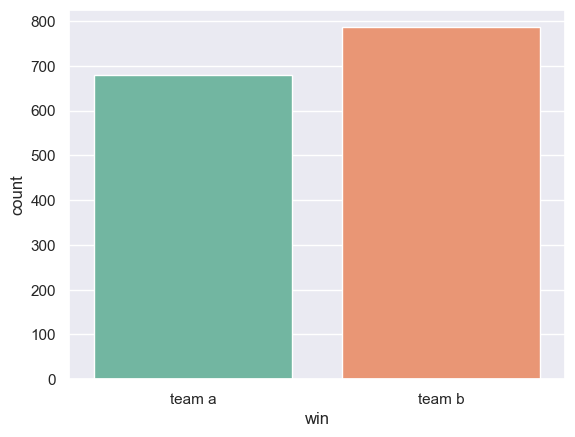

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="win", data=cs_data[["win"]], palette="Set2", hue="win")
plt.show()

In [11]:
cs_data[["map"]].value_counts()

map                 
de_mirage               407
de_anubis               220
de_inferno              198
de_ancient              188
de_dust2                180
de_nuke                 120
de_vertigo              107
de_train                 28
de_overpass               4
aim_map                   4
awp_india                 2
aim_crashz_dust_1on1      1
de_ravine                 1
de_foroglio               1
awp_orange                1
awp_lego_2                1
aim_redline               1
dorf                      1
Name: count, dtype: int64

In [12]:
values_to_remove = ['aim_map', 'awp_india', 'aim_crashz_dust_1on1', 'de_ravine', 'de_foroglio', 'awp_orange', 'awp_lego_2', 'aim_redline','dorf']

In [14]:
cs_data = cs_data[~cs_data['map'].isin(values_to_remove)]

In [17]:
cs_data[["map"]].value_counts()

map        
de_mirage      407
de_anubis      220
de_inferno     198
de_ancient     188
de_dust2       180
de_nuke        120
de_vertigo     107
de_train        28
de_overpass      4
Name: count, dtype: int64

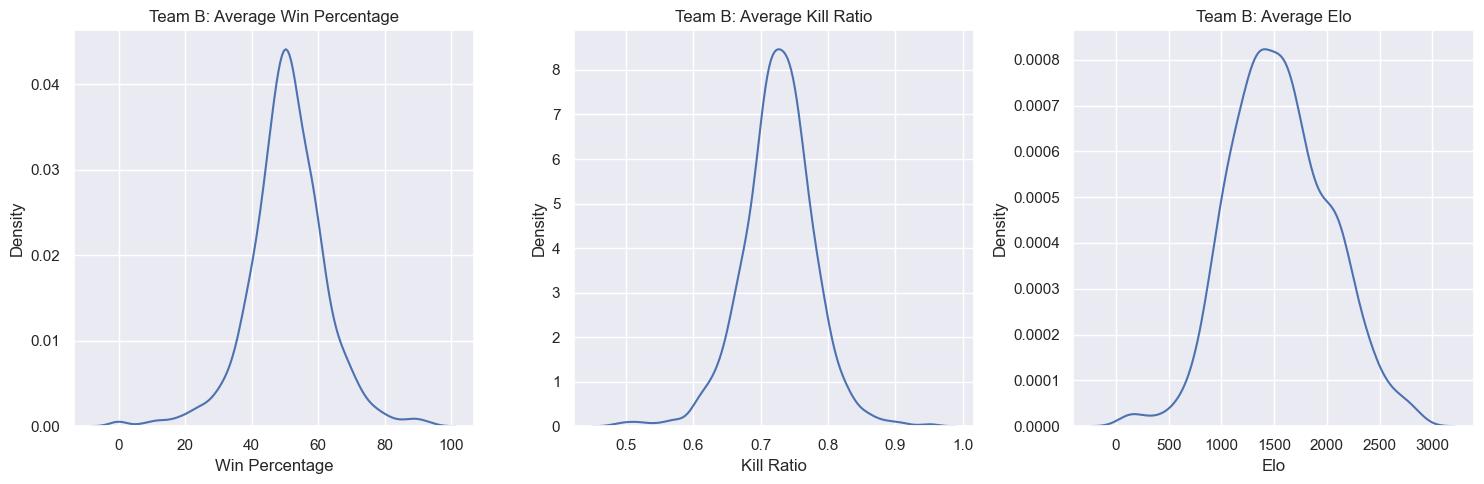

In [18]:
sns.set(style="darkgrid")
f, gr = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(data=cs_data, x="Team_B_avg_win_percentage", ax=gr[0]) 
gr[0].set_title('Team B: Average Win Percentage')
gr[0].set_xlabel('Win Percentage')

sns.kdeplot(data=cs_data, x="Team_B_avg_KR", ax=gr[1]) 
gr[1].set_title('Team B: Average Kill Ratio')
gr[1].set_xlabel('Kill Ratio')

sns.kdeplot(data=cs_data, x="Team_B_avg_elo", ax=gr[2]) 
gr[2].set_title('Team B: Average Elo')
gr[2].set_xlabel('Elo')

plt.tight_layout()
plt.show()

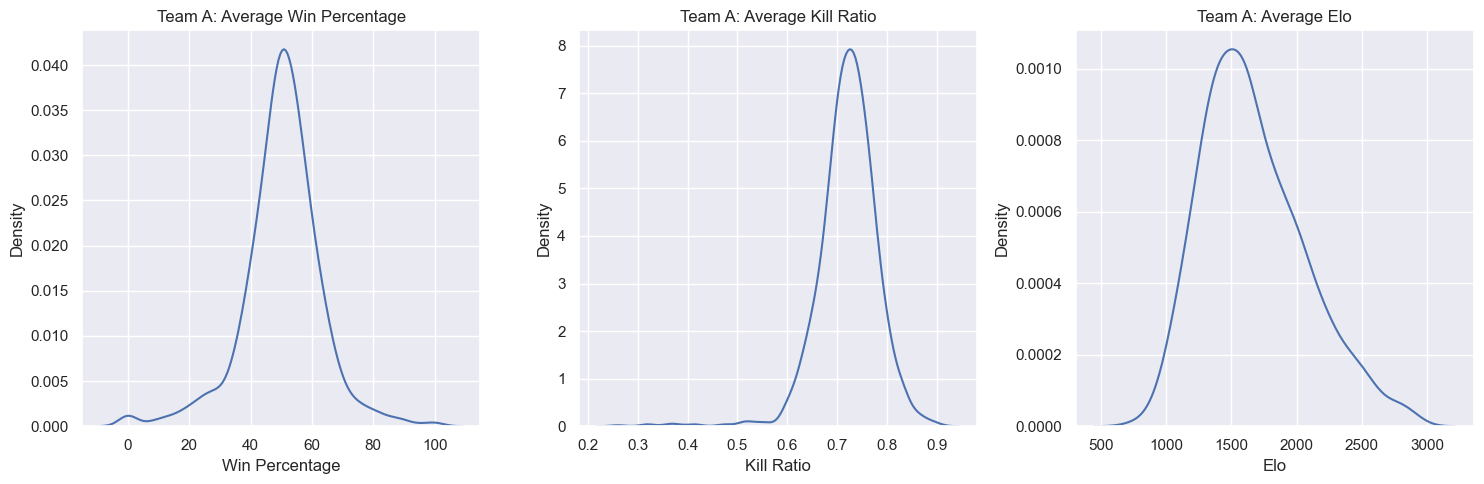

In [10]:
sns.set(style="darkgrid")
f, gr = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(data=cs_data, x="Team_A_avg_win_percentage", ax=gr[0]) 
gr[0].set_title('Team A: Average Win Percentage')
gr[0].set_xlabel('Win Percentage')

sns.kdeplot(data=cs_data, x="Team_A_avg_KR", ax=gr[1]) 
gr[1].set_title('Team A: Average Kill Ratio')
gr[1].set_xlabel('Kill Ratio')

sns.kdeplot(data=cs_data, x="Team_A_avg_elo", ax=gr[2]) 
gr[2].set_title('Team A: Average Elo')
gr[2].set_xlabel('Elo')

plt.tight_layout()
plt.show()

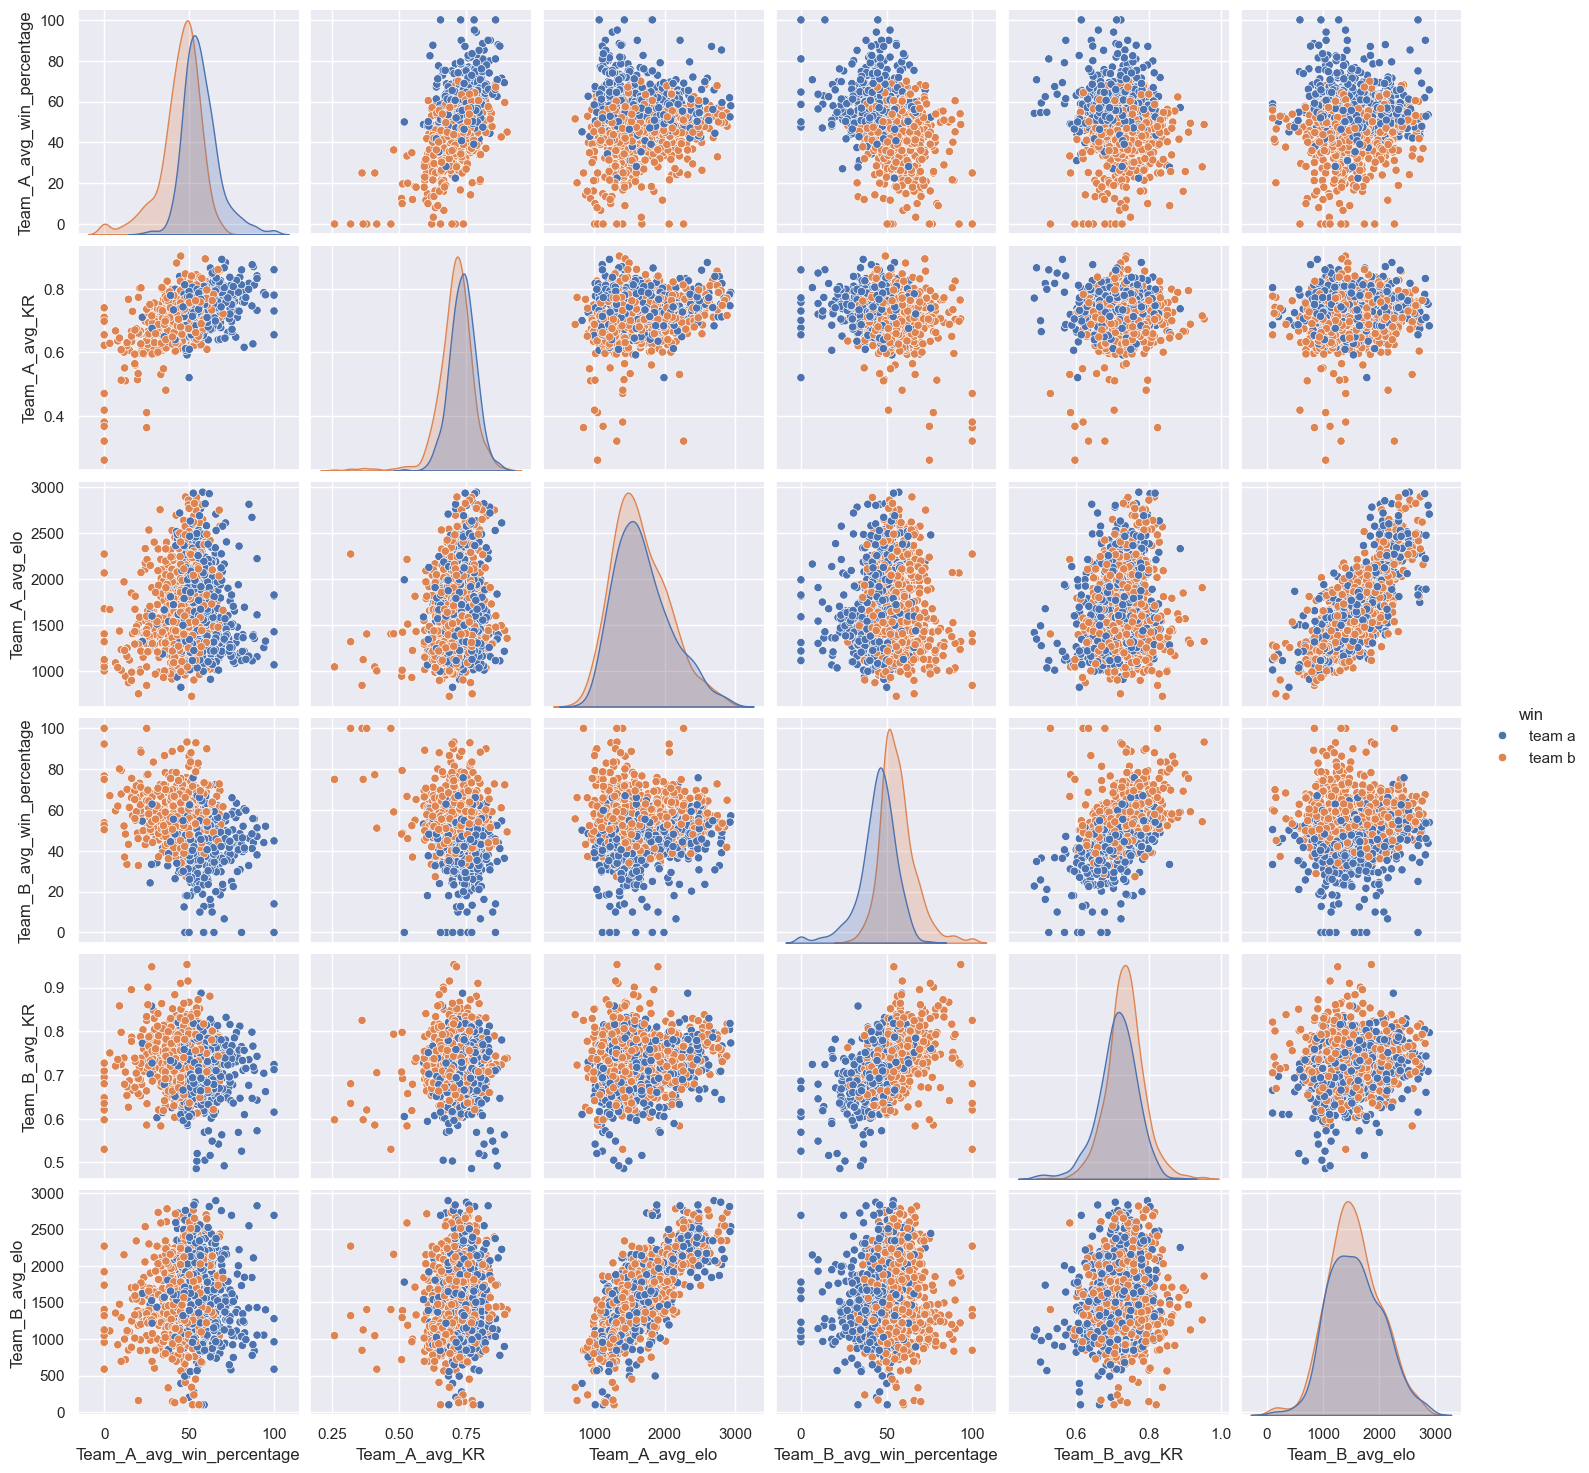

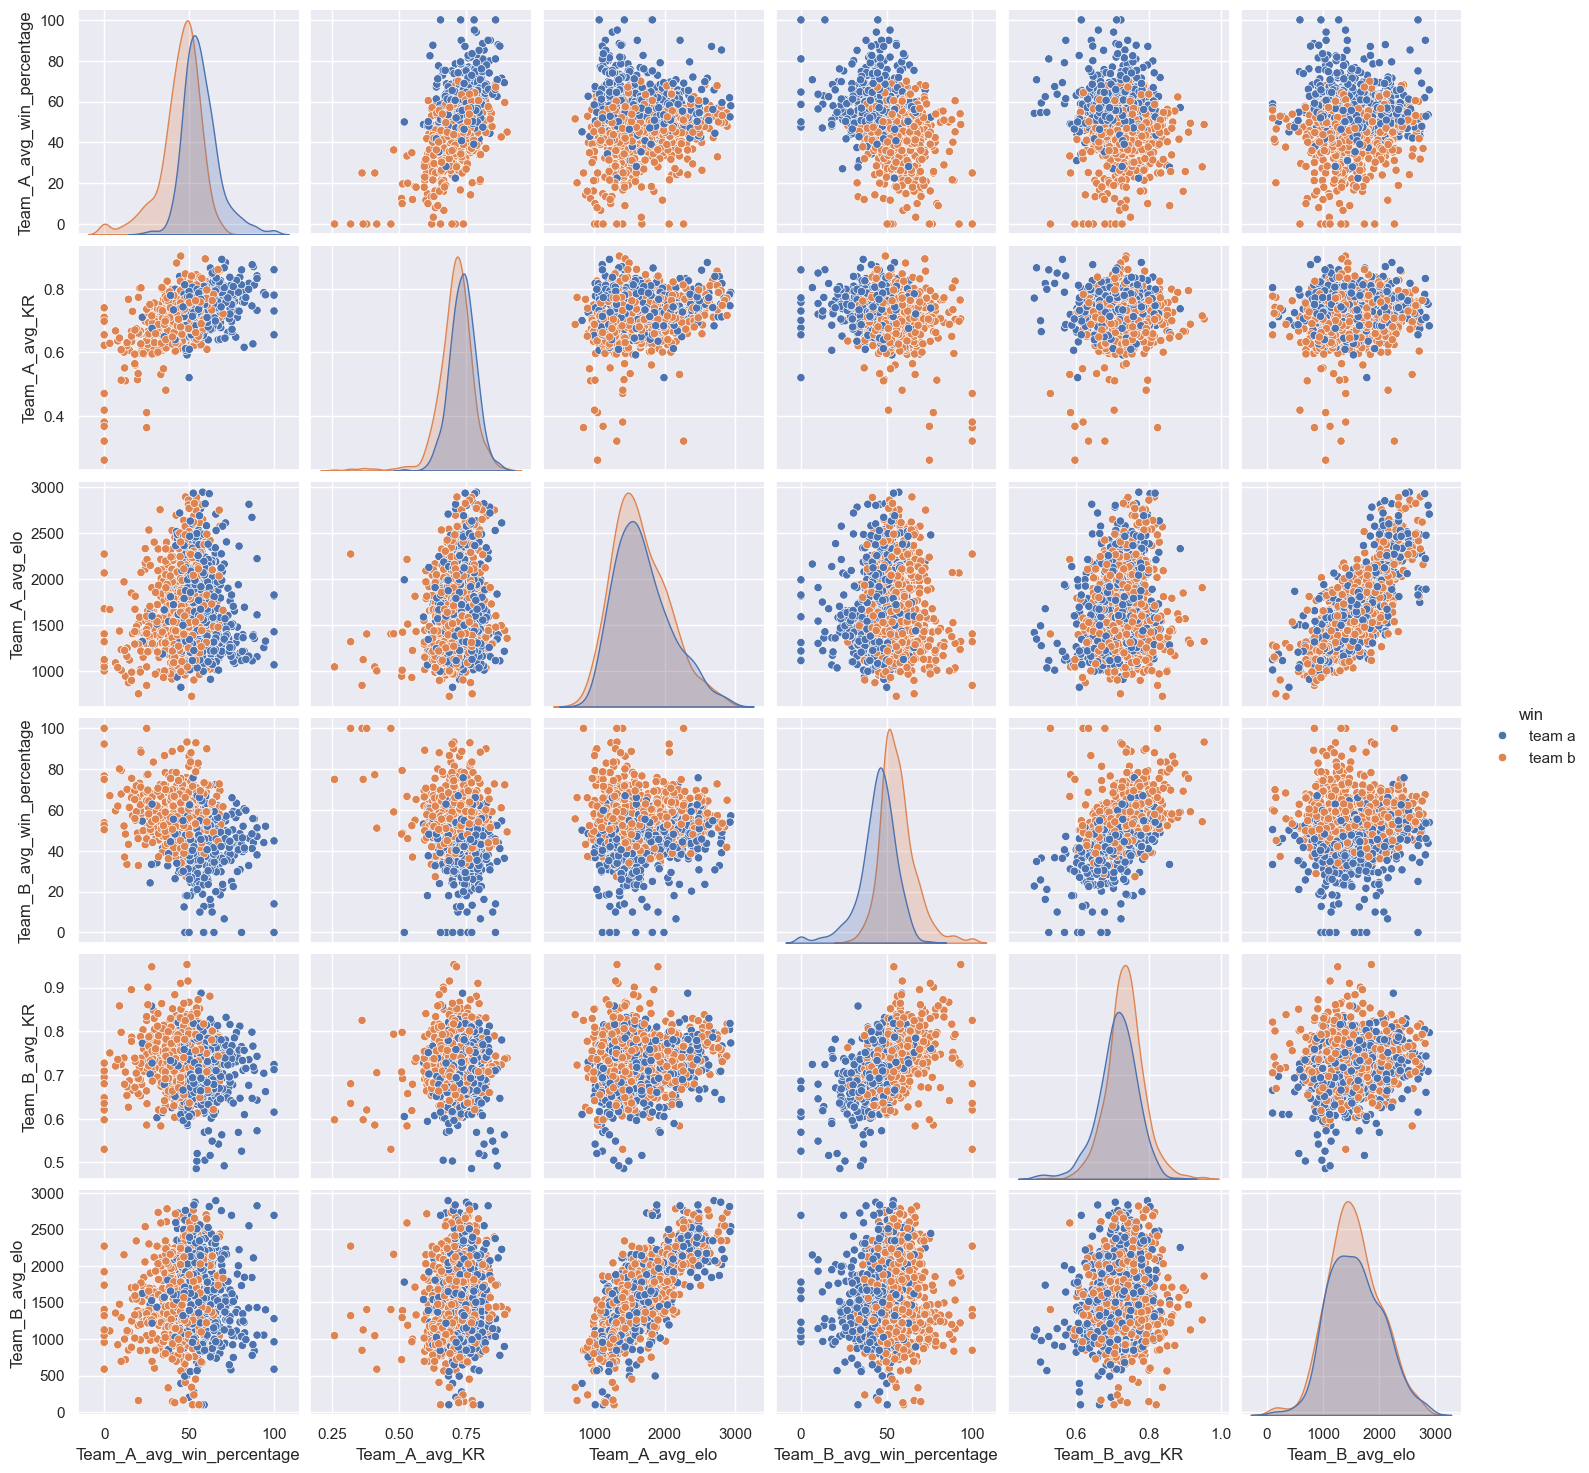

In [12]:
sns.pairplot(data=cs_data, hue="win")
plt.show()

<Figure size 1200x800 with 0 Axes>

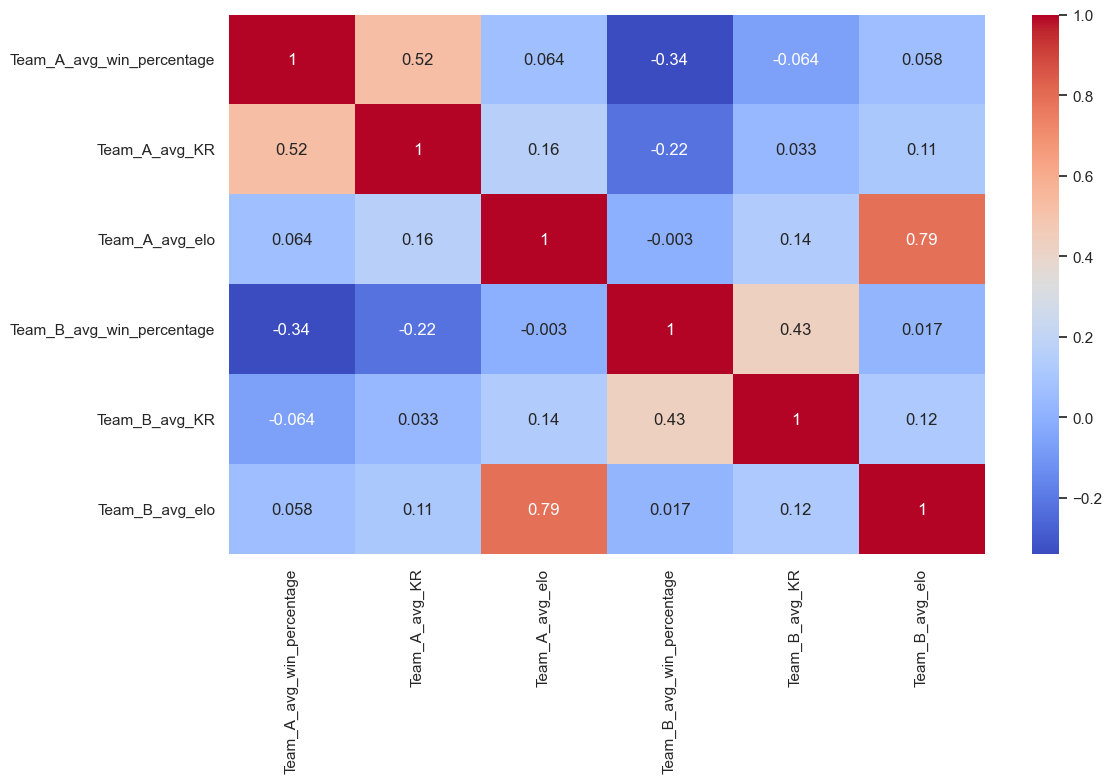

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=cs_data.drop(columns=["win","map","\tMatch ID"]).corr(), 
            annot=True, 
            cmap="coolwarm")
plt.tight_layout() 
plt.show()

In [18]:
cs_data.drop(columns=["win","map","\tMatch ID"])

,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo
0,58.864865,0.726308,1720.4,47.289216,0.792615,1536
1,52.341629,0.764807,1989.6,54.823232,0.762641,2073
2,20.202020,0.773030,753.8,66.095238,0.722705,158
3,48.414652,0.733409,2565.0,62.631108,0.838246,2219
4,43.571196,0.709982,1484.4,55.513072,0.768946,1352
...,...,...,...,...,...,...
1460,56.962213,0.766837,1916.0,45.598650,0.692673,1967
1461,56.580859,0.758207,1580.0,69.394938,0.759019,2026
1462,46.397195,0.742710,1497.2,54.778613,0.665482,1319
1463,53.792449,0.762264,1533.4,53.216783,0.755543,450
